## import libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing & Reading the dataset 

In [105]:
df_weather = pd.read_csv('./raw_data/weatherHistory.csv')

In [106]:
df_weather_row_count, df_weather_column_count=df_weather.shape
print('Total number of rows:', df_weather_row_count)
print('Total number of columns:', df_weather_column_count)

Total number of rows: 96453
Total number of columns: 12


# Preprocessing

## Initial Analysis of Data

In [107]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [108]:
print ("Unique values are:\n",df_weather.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


## Missing Value Detection

In [109]:
wt_missing =df_weather.isna().sum()
wt_missing 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [110]:
# get the number of missing data points per column
missing_value_count = (df_weather.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percentage of missing data
total_cells = np.product(df_weather.shape)
total_missing_value = missing_value_count.sum()
print("Total percentage of our missing value is:",round((total_missing_value / total_cells * 100),4))
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)

Precip Type    517
dtype: int64
Total percentage of our missing value is: 0.0447
Total number of our cells is : 1157436
Total number of our missing value is : 517


In [111]:
df_weather['Precip Type'].fillna(df_weather['Precip Type'].value_counts().index[0],inplace=True)
df_weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## Remove unimportant features

So Now let's delete 'Daily Summary', we do not need it because we do have 'Summary' feature

In [112]:
df_weather.drop(["Daily Summary"], axis=1, inplace=True)

In [113]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'],
      dtype='object')

Remove variables which do not have much impact on the prediction. Calculate the value of loud cover: it is same for all rows, so I can remove it.

In [114]:
df_weather['Loud Cover'].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

In [115]:
df_weather.drop(['Loud Cover'],axis=1,inplace=True)

In [116]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

## Convert categorical data

In [117]:
le = LabelEncoder()
df_weather['Precip Type']=le.fit_transform(df_weather['Precip Type'])
df_weather['Summary']=le.fit_transform(df_weather['Summary'])
df_weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,2006-04-01 05:00:00.000 +0200,19,0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,2006-04-01 06:00:00.000 +0200,19,0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,2006-04-01 07:00:00.000 +0200,19,0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,2006-04-01 08:00:00.000 +0200,19,0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,2006-04-01 09:00:00.000 +0200,19,0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [118]:
df_weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,2006-04-01 05:00:00.000 +0200,19,0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,2006-04-01 06:00:00.000 +0200,19,0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,2006-04-01 07:00:00.000 +0200,19,0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,2006-04-01 08:00:00.000 +0200,19,0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,2006-04-01 09:00:00.000 +0200,19,0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


## Data visualization

array([<Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>], dtype=object)

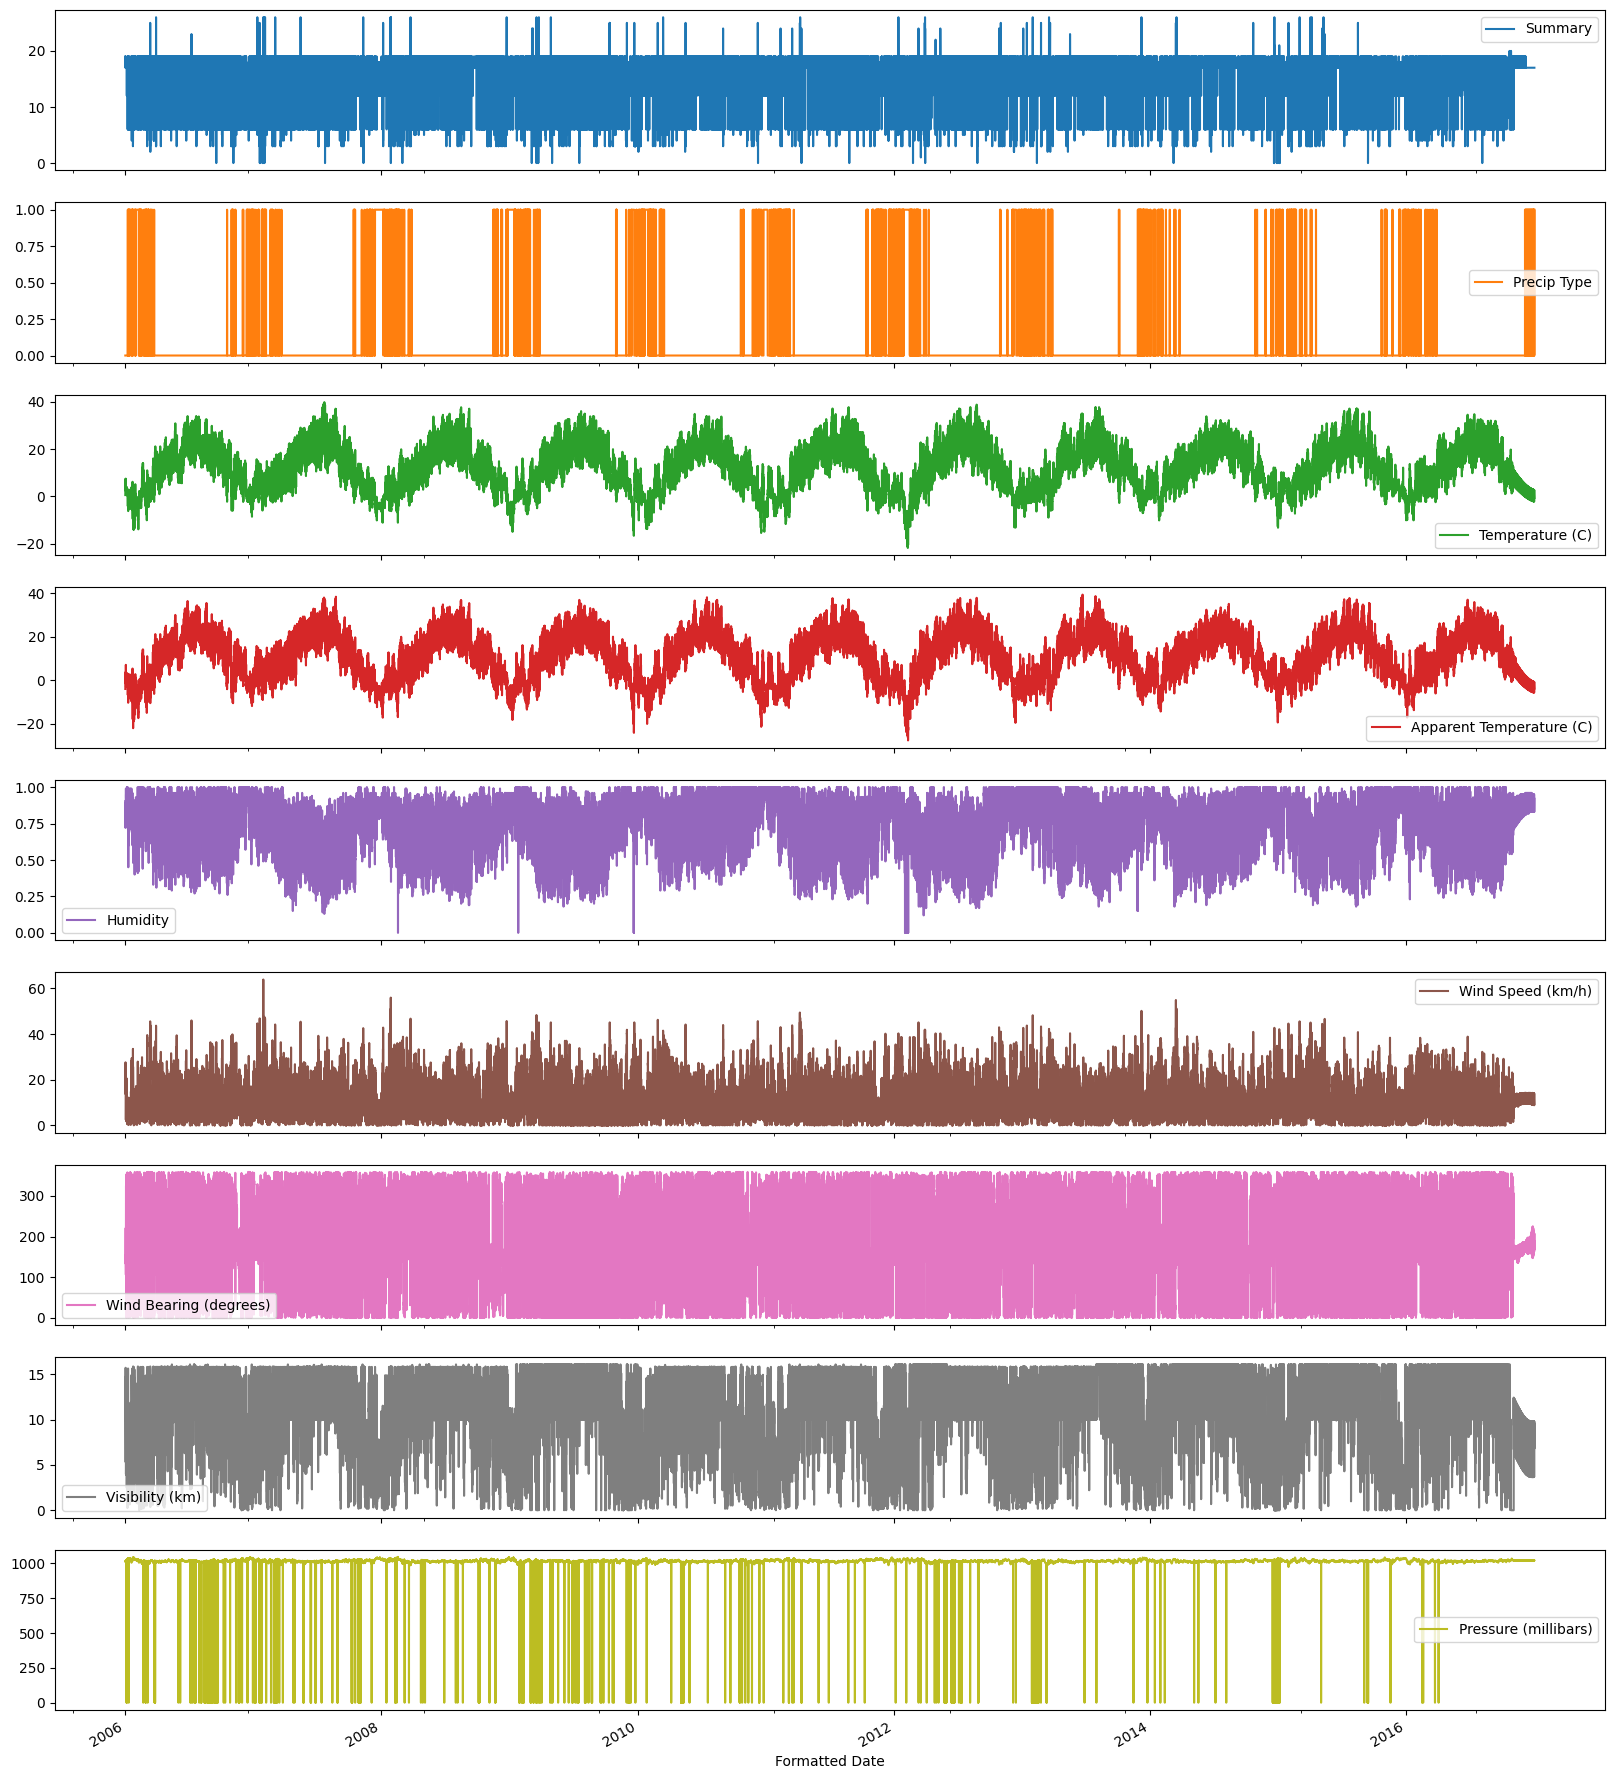

In [119]:
date_time = pd.to_datetime(df_weather.pop('Formatted Date'))
plot_cols = df_weather.columns
plot_features = df_weather[plot_cols]
plot_features.index = date_time
plot_features.plot( figsize=(20,25), subplots=True)

## Inspect and cleanup

In [120]:
df_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Summary,96453.0,16.006024,4.361497,0.000000,17.000000,18.0000,19.000000,26.000000
Precip Type,96453.0,0.111059,0.314207,0.000000,0.000000,0.0000,0.000000,1.000000
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


### Pressure (millibars)

In [121]:
df_weather["Pressure (millibars)"].value_counts()

Pressure (millibars)
0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
           ... 
998.75        1
1039.86       1
1042.97       1
1043.01       1
997.59        1
Name: count, Length: 4979, dtype: int64

Tính tỉ lệ nhiễu (ngoại lai):

In [122]:
pressure = df_weather['Pressure (millibars)']
bad_pressure = pressure == 0
# has_rain = rain != 0
# rain[ bad_rain] = 0
# rain[has_rain] = 1

pressure[bad_pressure].count()

print("Total percentage of our missing value is:",round((pressure[bad_pressure].count() / pressure.count() * 100),4))


Total percentage of our missing value is: 1.3354


Loại bỏ nhiễu (ngoại lai):

In [123]:
pressure.loc[bad_pressure] = pressure.mean()

/tmp/ipykernel_17611/4003182636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure.loc[bad_pressure] = pressure.mean()


array([<Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>], dtype=object)

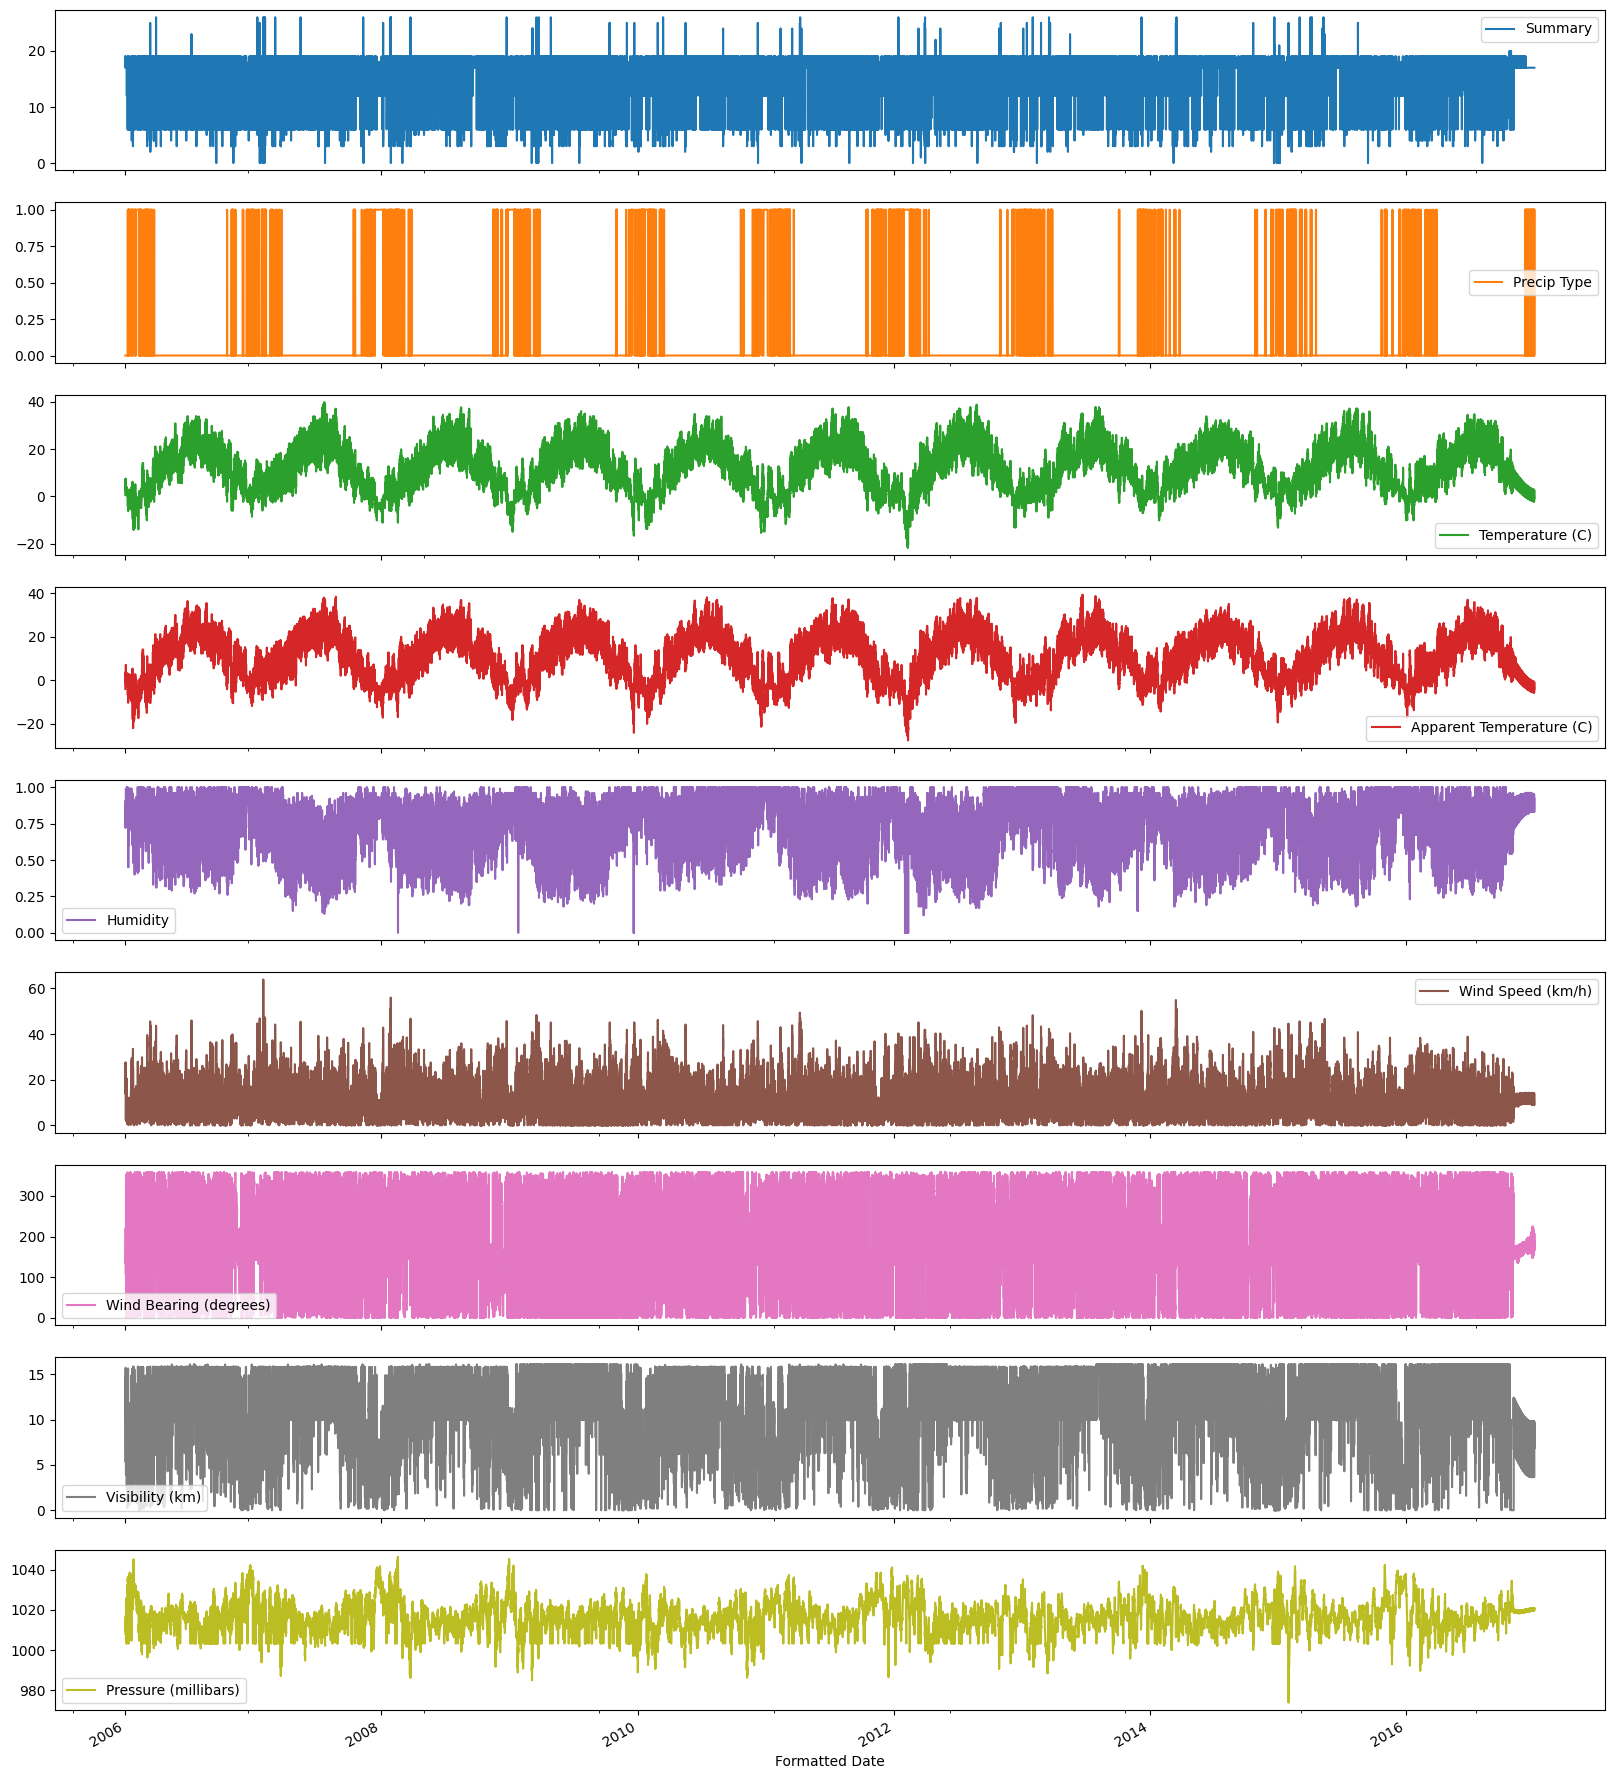

In [124]:
plot_cols = df_weather.columns
plot_features = df_weather[plot_cols]
plot_features.index = date_time
plot_features.plot( figsize=(20,25), subplots=True)

## Feature engineering
Trước khi bắt đầu xây dựng mô hình, điều quan trọng là phải hiểu dữ liệu của bạn và đảm bảo rằng bạn đang chuyển dữ liệu được định dạng phù hợp cho mô hình.

### Wind
Wind Bearing(degrees) —giới thiệu hướng gió theo đơn vị độ. Các góc không tạo ra đầu vào mô hình tốt: 360 ° và 0 ° phải gần nhau và quấn quanh trơn tru. Phương hướng sẽ không thành vấn đề nếu gió không thổi.

Text(0, 0.5, 'Wind Velocity [km/h]')

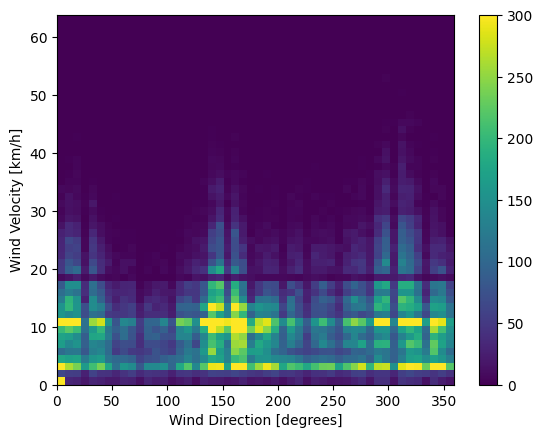

In [125]:
plt.hist2d(df_weather['Wind Bearing (degrees)'], df_weather['Wind Speed (km/h)'], bins=(50, 50), vmax=300)
plt.colorbar()
plt.xlabel('Wind Direction [degrees]')
plt.ylabel('Wind Velocity [km/h]')

Chuyển hướng gió và vận tốc gió thành vector.

In [126]:
wv = df_weather.pop('Wind Speed (km/h)')

# Convert to radians.
wd_rad = df_weather.pop('Wind Bearing (degrees)')*np.pi / 180

# Calculate the wind x and y components.
df_weather['Wx'] = wv*np.cos(wd_rad)
df_weather['Wy'] = wv*np.sin(wd_rad)


(-43.126701119910614, 42.78495677847904, -50.9949537688458, 45.9333)

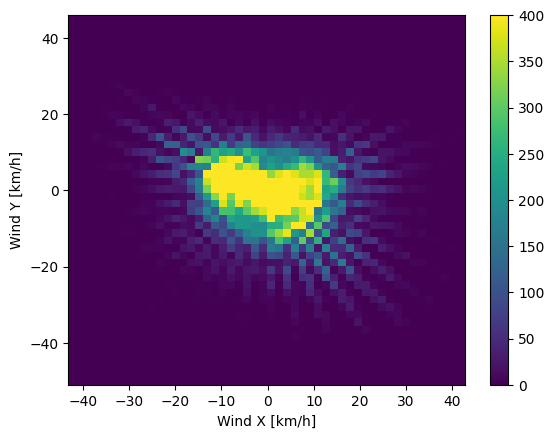

In [127]:
plt.hist2d(df_weather['Wx'], df_weather['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [km/h]')
plt.ylabel('Wind Y [km/h]')
ax = plt.gca()
ax.axis('tight')

### Time
Tương tự như hướng gió, thời gian tính bằng giây không phải là đầu vào mô hình hữu ích. Là dữ liệu thời tiết, nó có tính định kỳ hàng ngày và hàng năm rõ ràng. 

Sử dụng các phép biến đổi sin và côsin để xóa các tín hiệu "Thời gian trong ngày" và "Thời gian trong năm":

In [128]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df_weather['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_weather['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_weather['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_weather['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

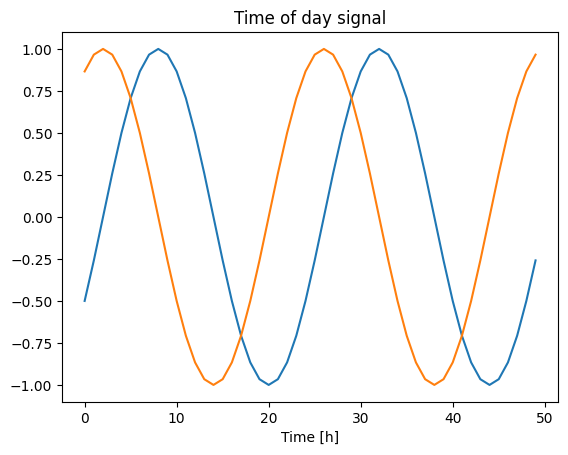

In [129]:
plt.plot(np.array(df_weather['Day sin'])[:50])
plt.plot(np.array(df_weather['Day cos'])[:50])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

## Split the data
Chia (70%, 20%, 10%) cho các tập huấn luyện, xác thực và thử nghiệm.

In [130]:
n = len(df_weather)
train_df = df_weather[0:int(n*0.7)]
val_df = df_weather[int(n*0.7):int(n*0.9)]
test_df = df_weather[int(n*0.9):]

num_features = df_weather.shape[1]

## Normalize the data
Chúng ta thực hiện chuẩn hóa dữ liệu bằng cách áp dụng phép chuẩn hóa Z-score (chuẩn hóa dữ liệu trong một tập hợp thành các giá trị có trung bình bằng 0 và độ lệch chuẩn bằng 1)

In [131]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

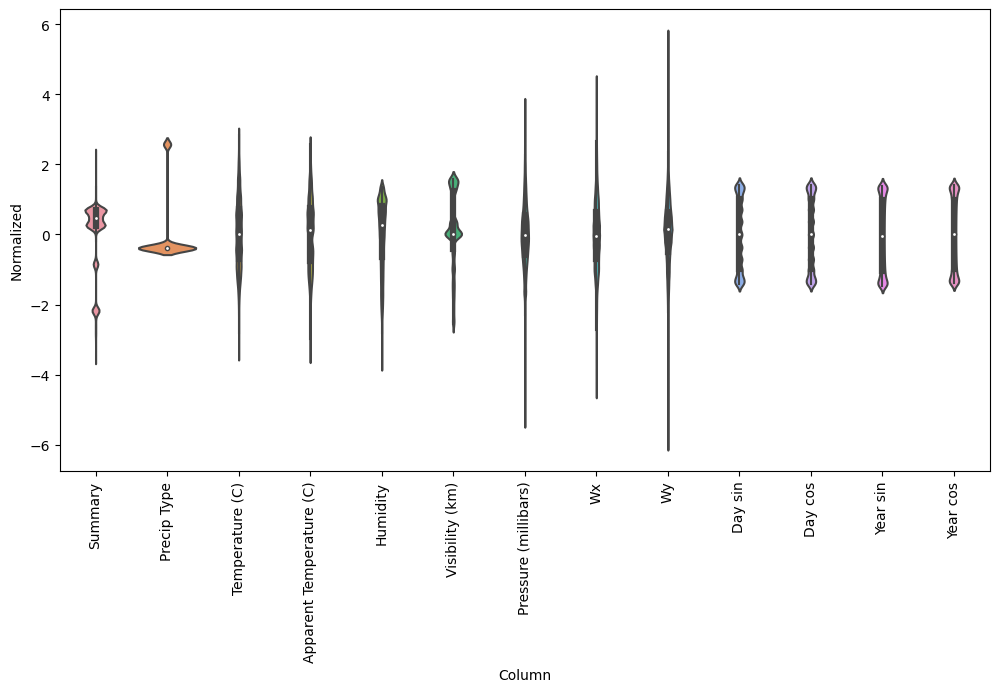

In [132]:
df_std = (df_weather - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_weather.keys(), rotation=90)

In [ ]:
train_df.to_csv(r'./processed_data/trainset.csv', index = False)
val_df.to_csv(r'./processed_data/valset.csv', index = False)
test_df.to_csv(r'./processed_data/testset.csv', index = False)